In [1]:
# General
import numpy as np

# Qiskit imports
import qiskit as qk

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

## Make sure your IBM Quantum API is activated

In order to run code on IBM Quantum, you need to connect your code to the IBM Quantum service. This can be accomplished by activating your IBM Quantum API token. In lay terms, an API, or Application Programming Interface, is a bridge that connects two programs. It allows one program to request functions/data from another. In our present case, we want to connect our code written with qiskit to the IBM Quantum systems so that we can implement Bells Inequality on an actual quantum computer.

This can be done by including the line 

"**QiskitRuntimeService.save_account(token="YOUR_API_TOKEN", channel="ibm_quantum")** 

after the 

**from qiskit_ibm_runtime import QiskitRuntimeService** 

statement. If the code you're working on is exclusively private and not published anywhere, you can directly copy and paste your token into this line of code. If, however, the code you're using is public, _do not do this_. Instead, you can use something like Codespace Secrets to initialize your service. You can do that using the following steps (whcih I took directly from https://github.com/ubsuny/CompPhys/tree/main/qiskit):

1. In the upper-right corner of any page on GitHub, click your profile photo, then click Settings.

2. In the "Code, planning, and automation" section of the sidebar, click  Codespaces.

3. To the right of "Codespaces secrets", click New secret.

4. Under "Name," type a name for your secret, use *IBMQUANTUM*.

5. Under "Value", copy the API key from your IBM quantum profile.

6. Select the "Repository access" drop-down menu, then click a repository you want to have access to the secret. Repeat for every repository you want to have access to the secret.

You can find your API token in the top right of the screen after by going to ibm.com/quantum and signing in. There's a button that allows you to copy the token to your clipboard. 

This line only needs to be run once. It will update your local configuration file which holds all of your qiskit and IBM Quantum credentials. On windows the configuration file is usually located at: C:\Users\YourUsername\.qiskit\qiskitrc. On Mac it's /home/YourUsername/.qiskit/qiskitrc.

Once the configuration file has been updated (i.e. you've run that line of code), you can simply use the line **service = QiskitRuntimeService()** to set up the connection between your code (qiskit in this case) and IBM Quantum's cloud services. This will work in any python file or github codespace you use.

In [13]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_sherbrooke'

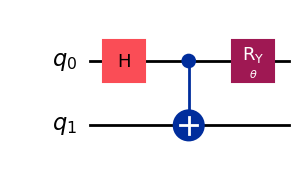

In [6]:
theta = qk.circuit.Parameter("$\\theta$")

chsh_circuit = qk.QuantumCircuit(2)
chsh_circuit.h(0)
chsh_circuit.cx(0, 1)
chsh_circuit.ry(theta, 0)
chsh_circuit.draw(output="mpl", idle_wires=False, style="iqp")

In [7]:
number_of_phases = 21
phases = np.linspace(0, 2 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

In [10]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab> -> <ZZ> - <ZX> + <XZ> + <XX>
observable1 = qk.quantum_info.SparsePauliOp.from_list([("ZZ", 1), ("ZX", -1), ("XZ", 1), ("XX", 1)])

# <CHSH2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
observable2 = qk.quantum_info.SparsePauliOp.from_list([("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)])

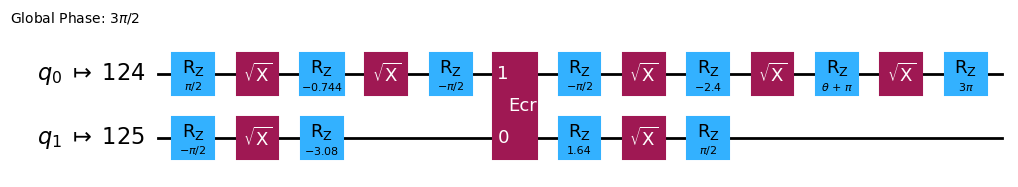

In [11]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

chsh_isa_circuit = pm.run(chsh_circuit)
chsh_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

In [12]:
isa_observable1 = observable1.apply_layout(layout=chsh_isa_circuit.layout)
isa_observable2 = observable2.apply_layout(layout=chsh_isa_circuit.layout)